<a href="https://colab.research.google.com/github/pabloinsente/CovNet_Human_Drawings/blob/master/code/CovNet_VGG-19_Drawings_bloock5_pool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature extraction from intermediate layers with VGG19 architecture and weights pre-trained on ImageNet

In [1]:
# Here we use tensorflow.keras API to process the data by using VGG19 
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

# to import filenames
from os import listdir
from os.path import isfile, join

# to handle data
import numpy as np

In [2]:
# Load base model with imagenet pre-trained weights 
base_model = VGG19(weights='imagenet')

## VGG-19 architecture  

VGG-19 is a 19 layer Convolutional Neural Network  
The **input layer** takes a 224x224x3 image (high, width, color channels)  
The **output layer** is a softmax on 1000 classes  
The **feature extraction** part goes from the input layer to the last max pooling layer  
The **classification** part goes from the last max pooling layer to the output layer  

Simonyan, and Zisserman paper:  
https://arxiv.org/pdf/1409.1556.pdf  
Keras reference:  
https://keras.io/applications/#vgg19    
![VGG-19 architecture](https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

In [3]:
# Here we can see the progression from layer to layer 
# The output shape column shows how the image gets compressed as 
# it pass through the layers
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Feature extraction for a single image

In [ ]:
####################################
# To get the data If you're in Colab
####################################

# Images are storage in GitHub. By running this we clone the data into Colab
! git clone https://github.com/pabloinsente/CovNet_Human_Drawings
# Run this just once per sesion

#**Otherwhise, just go to the next cell

Cloning into 'CovNet_Human_Drawings'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (240/240), done.
remote: Total 275 (delta 44), reused 246 (delta 32), pack-reused 0
Receiving objects: 100% (275/275), 11.98 MiB | 6.81 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
####################################
# To get the data If you're in Colab
####################################

# Images are storage in GitHub. By running this we clone the data into Colab
! git clone https://github.com/pabloinsente/CovNet_Human_Drawings
# Run this just once per sesion

# Now repo data is available in Colab local environment
!ls CovNet_Human_Drawings/data

In [ ]:
# Now repo data is available in Colab local environment
!ls CovNet_Human_Drawings/data

code  data  figures  README.md


In [ ]:
# Drawing data
# You can run this if you want to check the path for a single image
# ! ls CovNet_Human_Drawings/data/humans_drawings/

In [4]:
# Load and reshape the image to be feed into the model
img_path = 'CovNet_Human_Drawings/data/humans_drawings/DAM001_F_DAPedit.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

ImportError: Could not import PIL.Image. The use of `array_to_img` requires PIL.

In [ ]:
#######################################
# Select a layer for feature extraction
#######################################

# Here we pick the maxpooling layer in block 5
feature_layer = "block5_pool"

# To check other layers
# feature_layer = "block1_pool "
# feature_layer = "block1_conv1 "
 
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer(feature_layer).output)

In [ ]:
# Do the feature extraction with block5 pooling layer
block5_pool_features = model.predict(x)

In [ ]:
# In block 5, we can check that feature has the same shape that the maxpooling 
# layer in block 5 (above drawing)
# Print tensor shape
print (block5_pool_features.shape)

(1, 7, 7, 512)


In [ ]:
# Print extracted feature as a tensor (i.e., feature)
# print(block5_pool_features)

In [ ]:
# Print extracted feature flattened as a 1D vector
vgg19_feature_np = np.array(block5_pool_features)
vgg19_feature_np.flatten()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Feature extraction from all images with block5 max pool layer

In [ ]:
# Get the drwawings filenames from directory 
from os import listdir
from os.path import isfile, join

path = 'CovNet_Human_Drawings/data/humans_drawings/'
filenames = [f for f in listdir(path) if isfile(join(path, f))]
len(filenames) # This should yield 208 

208

In [ ]:
# First pick the layer for feature extraction
# A list of the layers' names is obtained by running "base_model.summary()"
feature_layer = "block5_pool" # let's take the last max pool as example
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer(feature_layer).output)

# Let's create a list to save flattened tensors as vectors
vgg19_feature_list = []

# Loop over filenames and append flattened tensor to vector list
for fname in filenames:
  # This part of the loop reshape and preprocess the input images 
  img_path = path + fname
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  # This part of the loop extract the featues and flatten the tensors to vectors
  vgg19_feature = model.predict(x)
  vgg19_feature_np = np.array(vgg19_feature)
  vgg19_feature_list.append(vgg19_feature_np.flatten())
  

In [ ]:
# Let's pass the VGG19 feature list to a numpy array
vgg19_feature_list_np = np.array(vgg19_feature_list)
print(type(vgg19_feature_list_np))
print(vgg19_feature_list_np.shape)

<class 'numpy.ndarray'>
(208, 25088)


In [ ]:
# Export numpy array as a csv file
np.savetxt("vgg19_vectors_drawings_block5_pool.csv", vgg19_feature_list_np, delimiter=",")

# Hierarchical clustering on drawings with vectors extracted from VGG19

In [20]:
# to import filenames
from os import listdir
from os.path import isfile, join

# to handle data
import numpy as np

In [22]:
#################################
# Load vector features from VGG19
#################################

path_np = '../data/vectors-features/'
filename = 'vgg19_vectors_drawings_block5_pool_kids_257_raw.npy'

vgg19_feature_list_np = np.load(path_np+filename)
vgg19_feature_list_np.shape # (257, 25088)

(257, 25088)

In [23]:
# Get the drawings filenames from directory 

# If relative path doesn't work, change path as nedeed
path = '../data/dap-drawings-kids/'
filenames = [f for f in listdir(path) if isfile(join(path, f))]
len(filenames) # This should yield 257

257

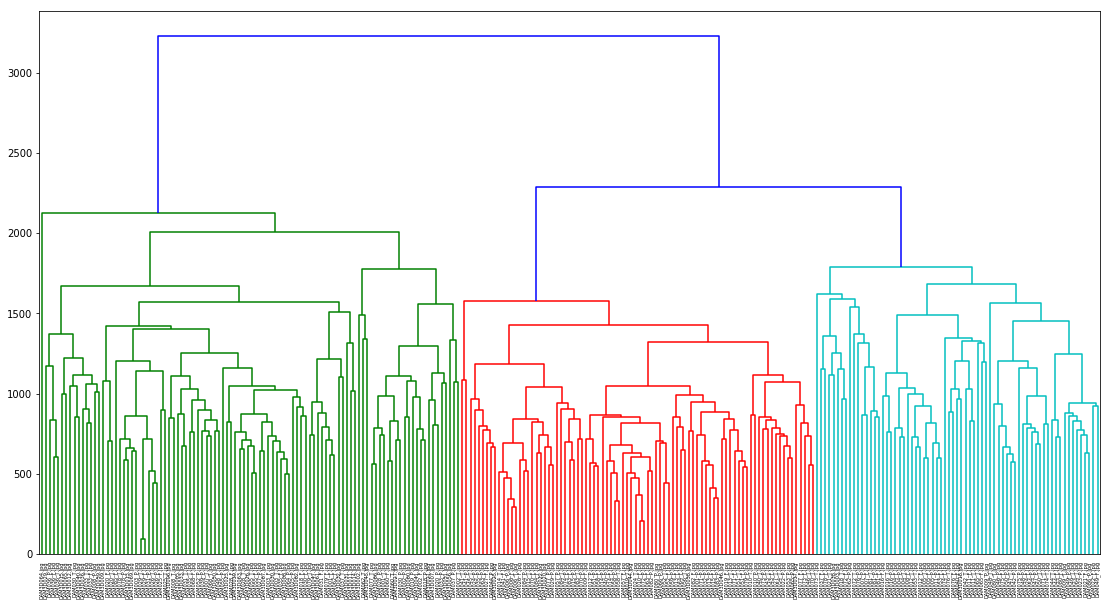

In [24]:
# Let's use scipy to plot a dendogram to do hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

# Let's use the 'ward' method to compute the distance between clusters which 
# minimize the variance between clusters
linked = linkage(vgg19_feature_list_np, 'ward')

# Use filenames as label list
labelList = filenames

# Plot the dendogram as a descendeing tree
plt.figure(figsize=(19, 10))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [46]:
# Based on the dendogram, it looks like we have 7 clusters
# Let's use sklearn to perform the hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

k = 7
hclustering = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
hclustering.fit(vgg19_feature_list_np)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=7,
                        pooling_func='deprecated')

In [47]:
# Print the cluster to which each image was assigned to
print(hclustering.labels_)  

[2 5 2 1 5 5 1 0 2 4 5 0 2 5 0 5 5 1 1 4 1 1 0 1 1 4 5 5 1 5 5 5 0 1 5 5 1
 0 1 5 1 1 1 1 1 5 2 5 1 1 0 0 5 0 5 2 1 5 1 1 0 5 4 2 5 1 5 5 5 4 1 5 5 5
 5 5 5 5 0 0 0 5 5 0 4 4 1 5 0 4 5 1 5 1 0 1 0 0 0 1 5 1 5 5 1 0 1 0 1 5 5
 5 1 4 5 1 1 3 5 5 1 5 4 6 1 1 5 5 5 0 0 0 1 5 5 1 1 5 1 1 1 0 5 4 4 5 5 1
 1 5 4 4 5 5 5 2 2 0 1 1 0 0 0 5 1 2 5 0 0 0 1 2 1 1 0 1 1 2 0 1 0 1 2 1 4
 0 1 0 5 5 1 5 1 5 2 5 5 2 1 0 5 0 4 1 5 1 4 0 1 0 5 1 4 1 5 1 5 6 0 5 0 5
 4 0 0 0 5 1 1 1 1 5 5 1 1 5 0 5 1 2 0 4 1 0 5 4 5 0 5 0 4 0 0 5 5 6 5]


## Plotting drawings by cluster

In [48]:
# To plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
%matplotlib inline

# to handle data
import pandas as pd

In [49]:
# First, let's create a pandas dataframe 
# this is necessary to plot the images by cluster later

# get filenames as a numpy aray
filenames_np = np.asarray(filenames)

# get cluster labels as a numpr array
clusters_np = hclustering.labels_

# create pandas dataframe stacking numpy arrays by column
drawings_df = pd.DataFrame({'filenames_np':filenames_np, 'clusters_np':clusters_np})

print(type(drawings_df))
print("Shape: ", drawings_df.shape)
print(drawings_df.head())

<class 'pandas.core.frame.DataFrame'>
Shape:  (257, 2)
   filenames_np  clusters_np
0  DAM073_T.jpg            2
1  DAM015_F.jpg            5
2  DAM076_P.jpg            2
3  DAM3D009.jpg            1
4  DAM063_P.jpg            5


In [50]:
# Let's subset the dataframe into 5 samller dataframes by cluster group

def subCluster(subcluster):
    '''Function to subset dataframes by cluster'''
    cluster = drawings_df.loc[drawings_df['clusters_np'] == subcluster]
    return cluster


cluster_1 = subCluster(0)
print("Lenght cluster 1: ", len(cluster_1))
print(cluster_1.head())

cluster_2 = subCluster(1)
print("Lenght cluster 2: ", len(cluster_2))
print(cluster_2.head())

cluster_3 = subCluster(2)
print("Lenght cluster 3: ", len(cluster_3))
print(cluster_3.head())

cluster_4 = subCluster(3)
print("Lenght cluster 4: ", len(cluster_4))
print(cluster_4.head())

cluster_5 = subCluster(4)
print("Lenght cluster 5: ", len(cluster_5))
print(cluster_5.head())

cluster_6 = subCluster(5)
print("Lenght cluster 6: ", len(cluster_6))
print(cluster_6.head())

cluster_7 = subCluster(6)
print("Lenght cluster 7: ", len(cluster_7))
print(cluster_7.head())

Lenght cluster 1:  53
    filenames_np  clusters_np
7   DAM040_F.jpg            0
11  DAM011_F.jpg            0
14  DAM009_T.jpg            0
22  DAM047_T.jpg            0
32  DAM044_T.jpg            0
Lenght cluster 2:  76
    filenames_np  clusters_np
3   DAM3D009.jpg            1
6   DAM035_T.jpg            1
17  DAM3D050.jpg            1
18  DAM3D029.jpg            1
20  DAM029_T.jpg            1
Lenght cluster 3:  16
    filenames_np  clusters_np
0   DAM073_T.jpg            2
2   DAM076_P.jpg            2
8   DAM018_T.jpg            2
12  DAM007_P.jpg            2
46  DAM007_F.jpg            2
Lenght cluster 4:  1
     filenames_np  clusters_np
117  DAM3D064.jpg            3
Lenght cluster 5:  22
    filenames_np  clusters_np
9   DAM028_P.jpg            4
19  DAM3D007.jpg            4
25  DAM077_T.jpg            4
62  DAM3D027.jpg            4
69  DAM001_T.jpg            4
Lenght cluster 6:  86
    filenames_np  clusters_np
1   DAM015_F.jpg            5
4   DAM063_P.jpg           

In [53]:
type(cluster_1)

pandas.core.frame.DataFrame

In [61]:
#########################################
# Function to save plots for each cluster
#########################################


def plotClusters(cluster, nrows, ncols, save_path, cluster_name):
    '''Plot images for a clusterin a grid.
     
     Arguments:
     cluster      -- cluster dtaframe name
     nrows        -- number of rows in the plot
     ncols        -- number of cols in the plot
     save_path    -- string path name to save plot
     cluster_name -- string name to save plot 
    '''
    assert isinstance(cluster, pd.DataFrame), "cluster is not pandas dataframe"
    assert isinstance(nrows, int)
    assert isinstance(ncols, int)
    assert isinstance(save_path, str)
    assert isinstance(cluster_name, str)
    
    # Image parameters
    width = 10
    height = 10
    fig=plt.figure(figsize=(18, 18)) 
    
    # We need to create a counter to loop over images and allocate 
    # the image in the right position in the grid
    pic_index = 0 
    
    # Loop over each pic and plot it in the the grid
    # .iterrows() is a method that works with pandas dataframes
    for index, row in (cluster.iterrows()): 
      pic_index += 1
      # Create grid to plot images
      fig.add_subplot(nrows, ncols, pic_index)
      img_path = path + row['filenames_np']
      img=mpimg.imread(img_path)
      imgplot = plt.imshow(img)
      # get rid off axis and grid within each pic
      plt.axis('off')
    save_path = '../figures/block5_layer_hc_all_kids_7_clusters/'
    plt.savefig(save_path+cluster_name+'.png', bbox_inches='tight')
    plt.show()

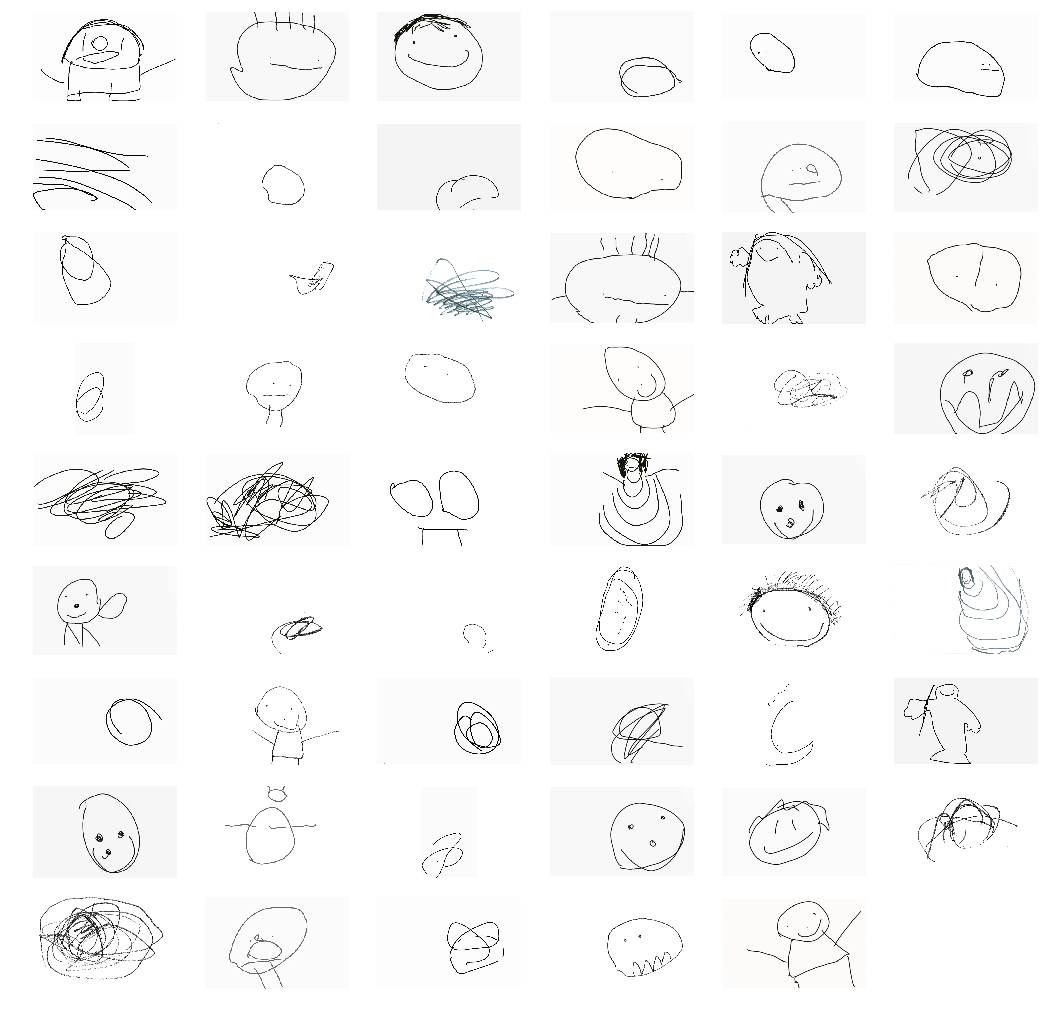

In [62]:
################
# Plot cluster 1
################

# pick the cluster to plot
cluster = cluster_1

# Define grid shape (for 53 images) 
nrows = 9
ncols = 6

# to save
save_path = '../figures/block5_layer_hc_all_kids_7_clusters/'
cluster_name = 'cluster_1'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

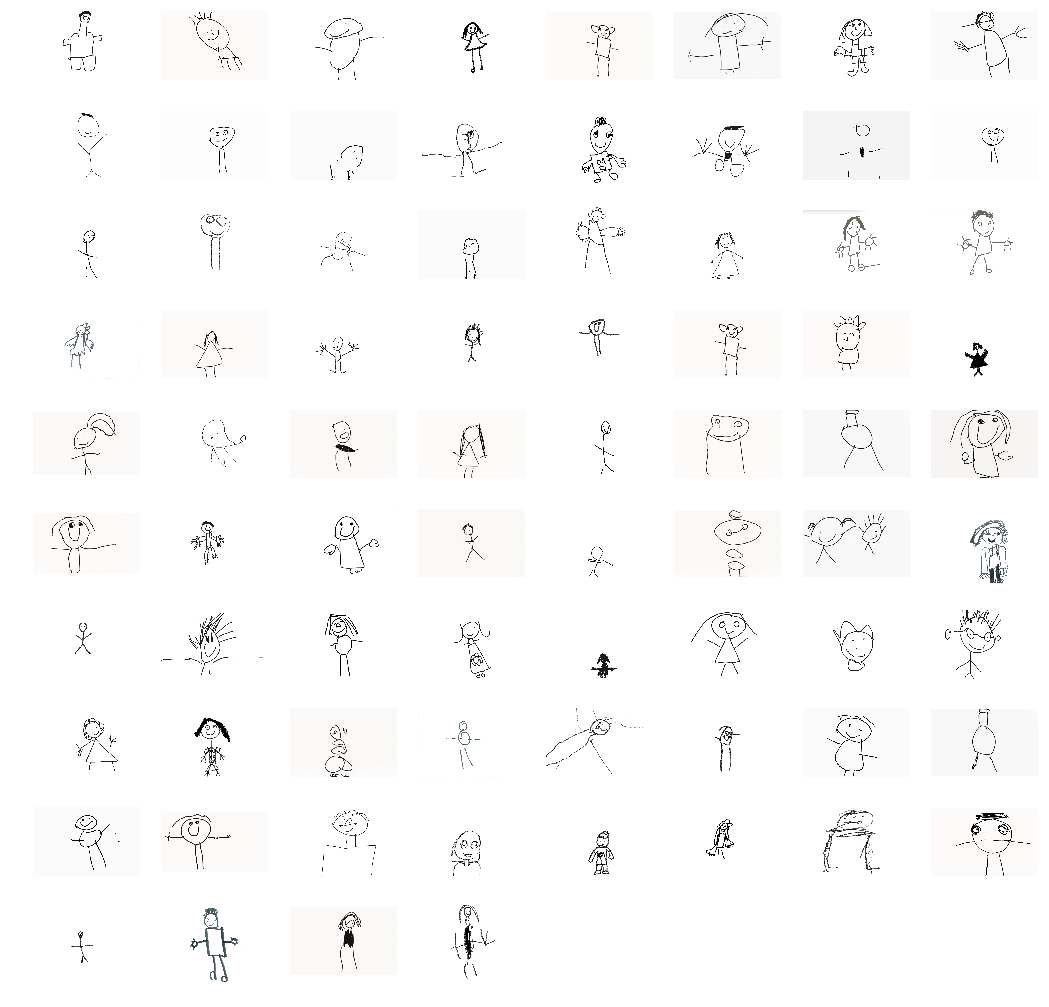

In [66]:
################
# Plot cluster 2
################

# pick the cluster to plot
cluster = cluster_2

# Define grid shape (for 76 images)
nrows = 10
ncols = 8

# to save
save_path = '../figures/block5_layer_hc_all_kids_7_clusters/'
cluster_name = 'cluster_2'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

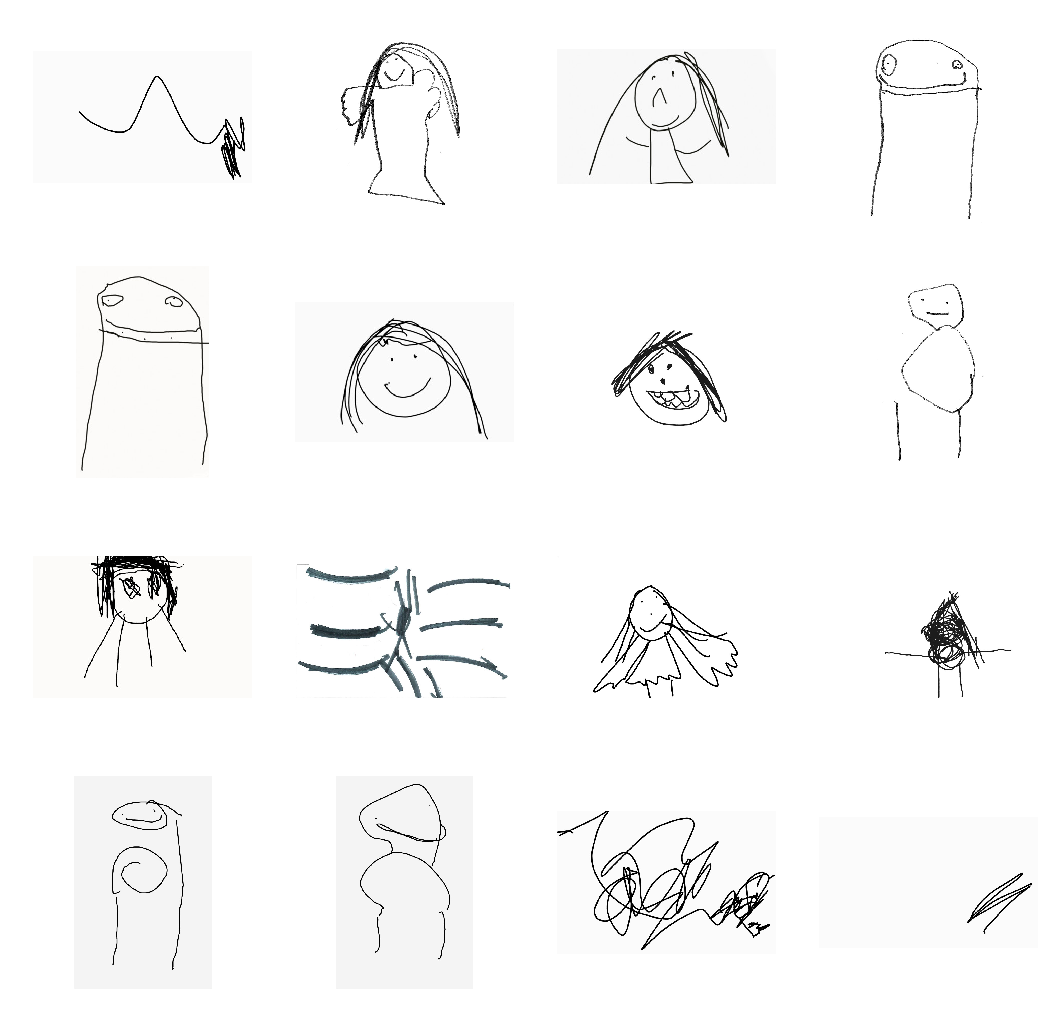

In [67]:
################
# Plot cluster 3
################

# pick the cluster to plot
cluster = cluster_3

# Define grid shape (for 16 images)
nrows = 4
ncols = 4

# to save
save_path = '../figures/block5_layer_hc_all_kids_7_clusters/'
cluster_name = 'cluster_3'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

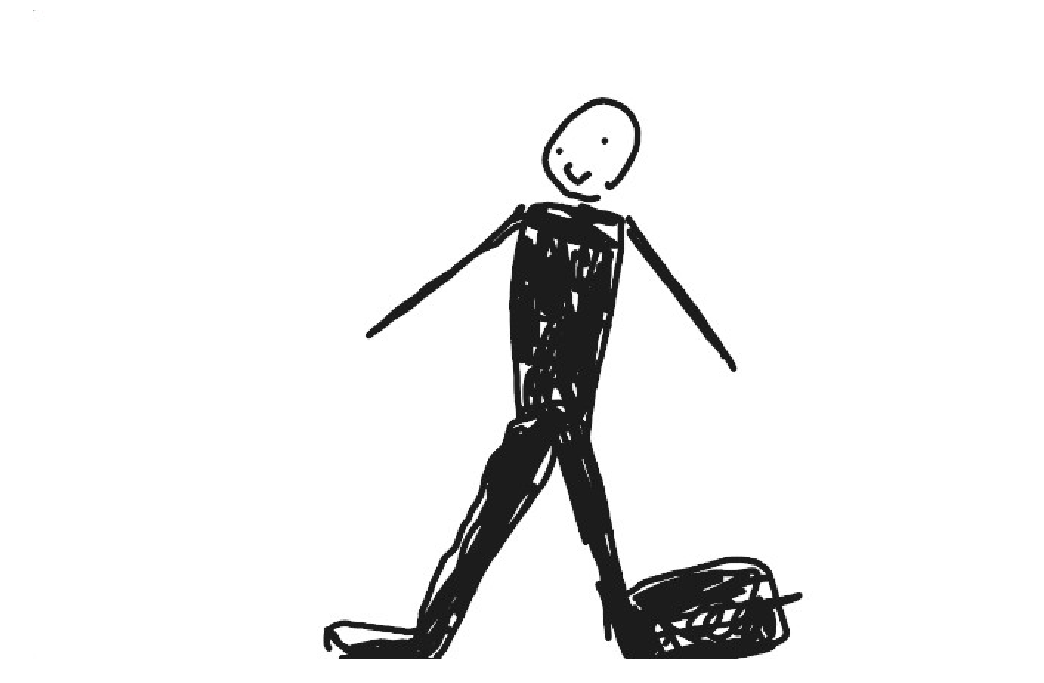

In [68]:
################
# Plot cluster 4
################

# pick the cluster to plot
cluster = cluster_4

# Define grid shape (for 1 image)
nrows = 1
ncols = 1

# to save
save_path = '../figures/block5_layer_hc_all_kids_7_clusters/'
cluster_name = 'cluster_4'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

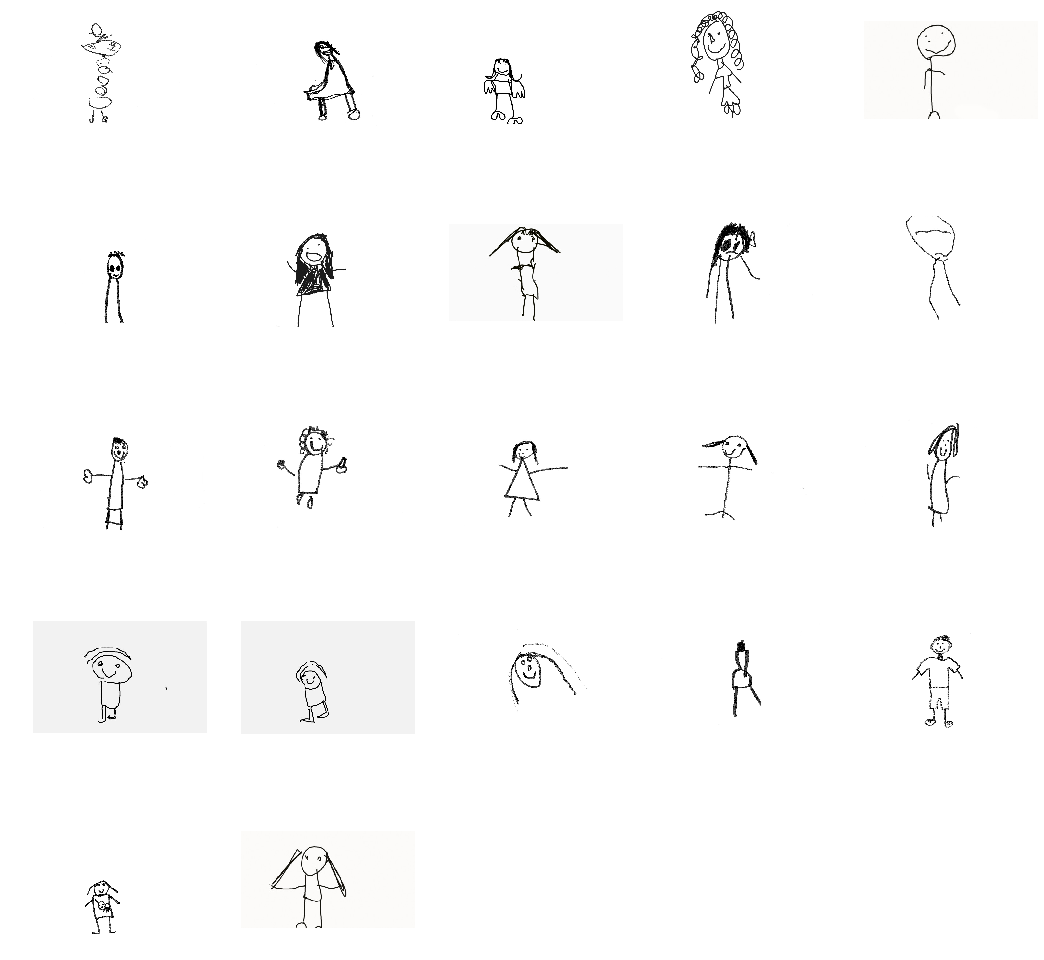

In [69]:
################
# Plot cluster 5
################

# pick the cluster to plot
cluster = cluster_5

# Define grid shape (for 22 images)
nrows = 5
ncols = 5

# to save
save_path = '../figures/block5_layer_hc_all_kids_7_clusters/'
cluster_name = 'cluster_5'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

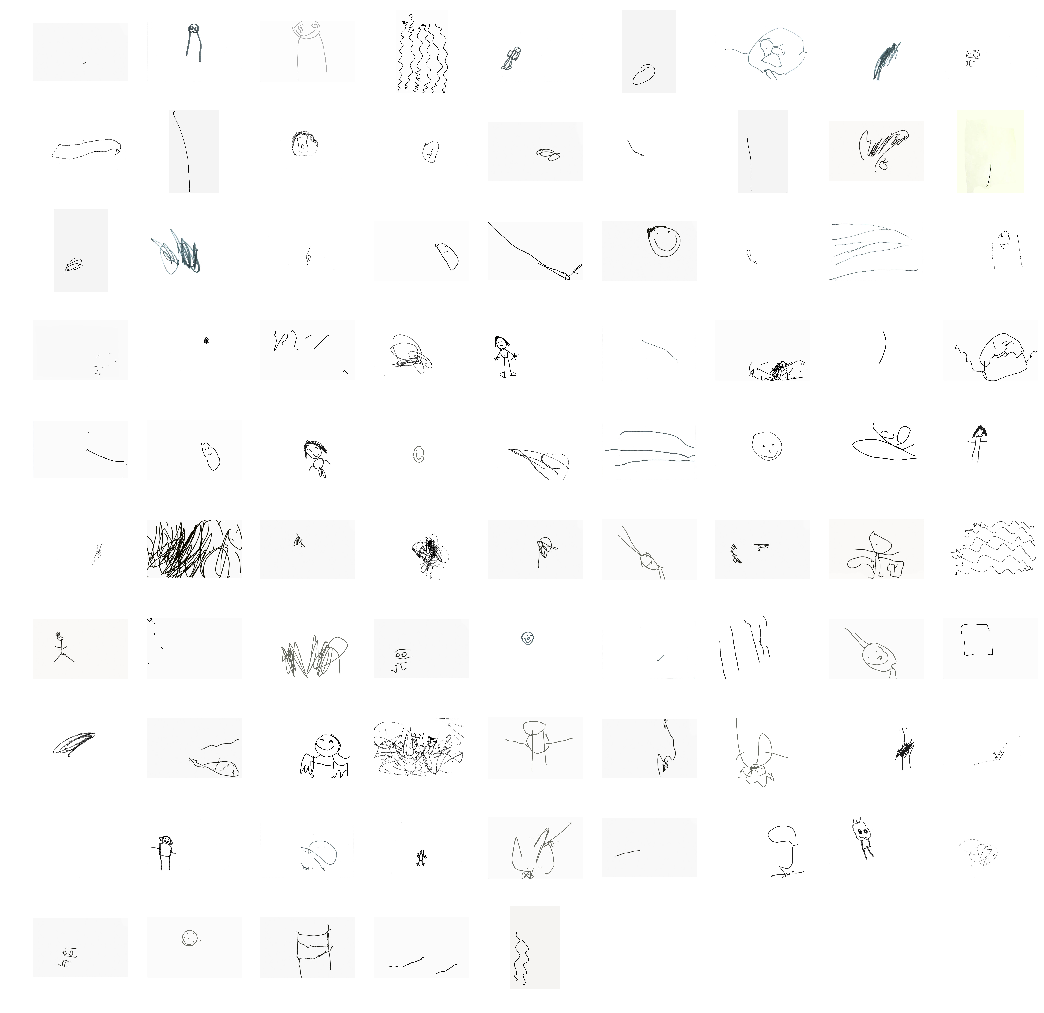

In [70]:
################
# Plot cluster 6
################

# pick the cluster to plot
cluster = cluster_6

# Define grid shape (for 86 images)
nrows = 10
ncols = 9

# to save
save_path = '../figures/block5_layer_hc_all_kids_7_clusters/'
cluster_name = 'cluster_6'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [ ]:
################
# Plot cluster 7
################

# pick the cluster to plot
cluster = cluster_7

# Define grid shape (for 3 images)
nrows = 1
ncols = 3

# to save
save_path = '../figures/block5_layer_hc_all_kids_7_clusters/'
cluster_name = 'cluster_7'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

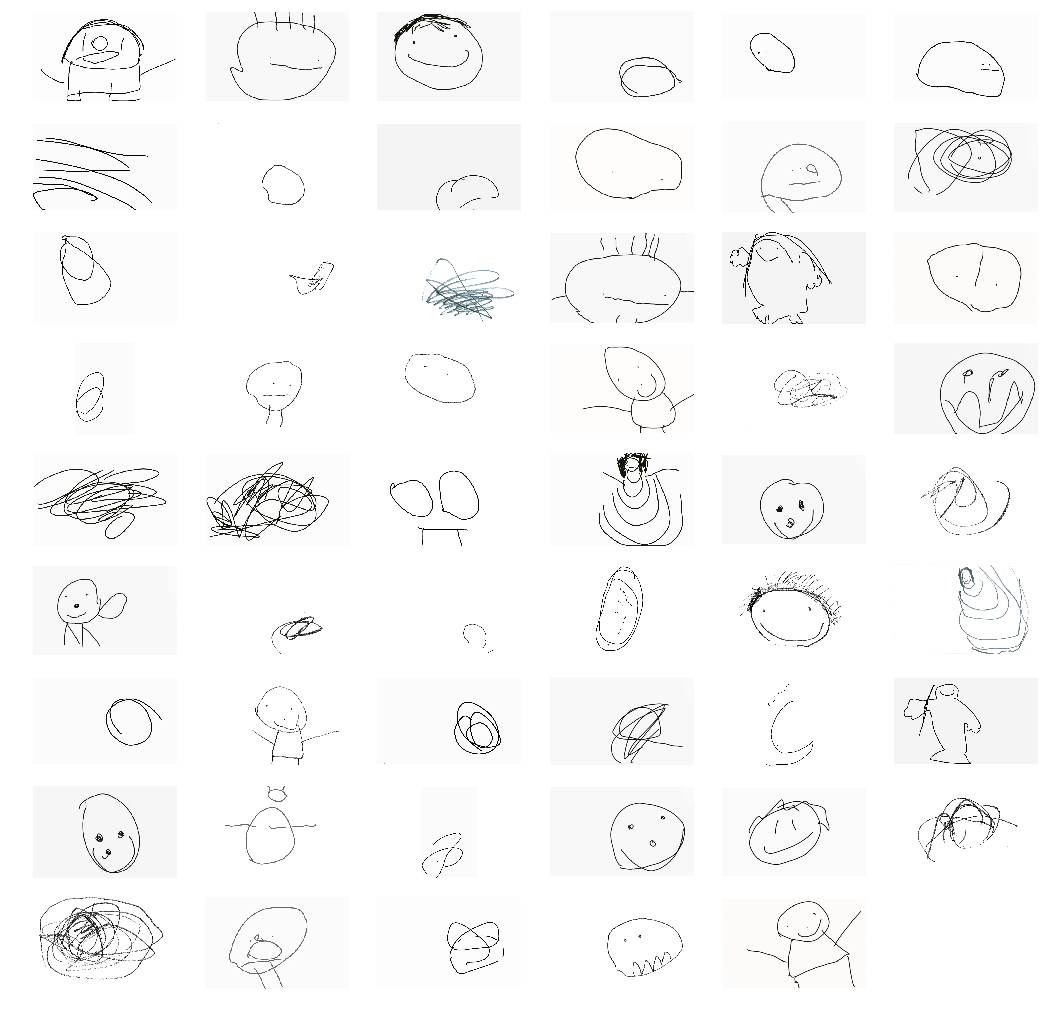

In [52]:
# Let's plot all images classified together in cluster 0

# Image parameters
width = 10
height = 10
nrows = 9
ncols = 6
fig=plt.figure(figsize=(18, 18)) 

# pick the cluster to plot
cluster = cluster_1

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')
save_path = '../figures/block5_layer_hc_all_kids_7_clusters/'
img_name = 'cluster_1_block5_pool_drawings.png'
plt.savefig(save_path+img_name, dpi=200)
plt.show()

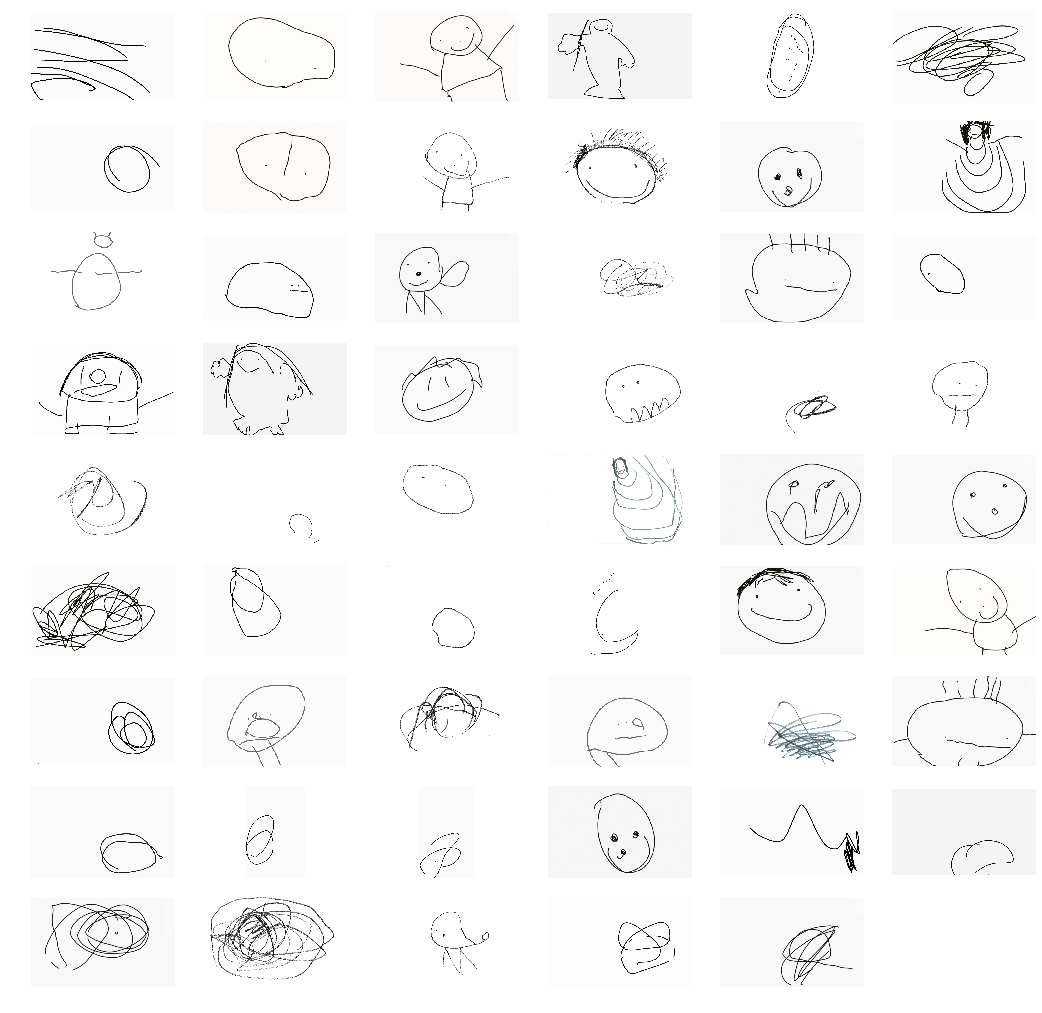

In [ ]:
# Let's plot all images classified together in cluster 1

# Image parameters
width = 10
height = 10
nrows = 9
ncols = 6
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_1

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_1_block5_pool_drawings.png', dpi=200)
plt.show()

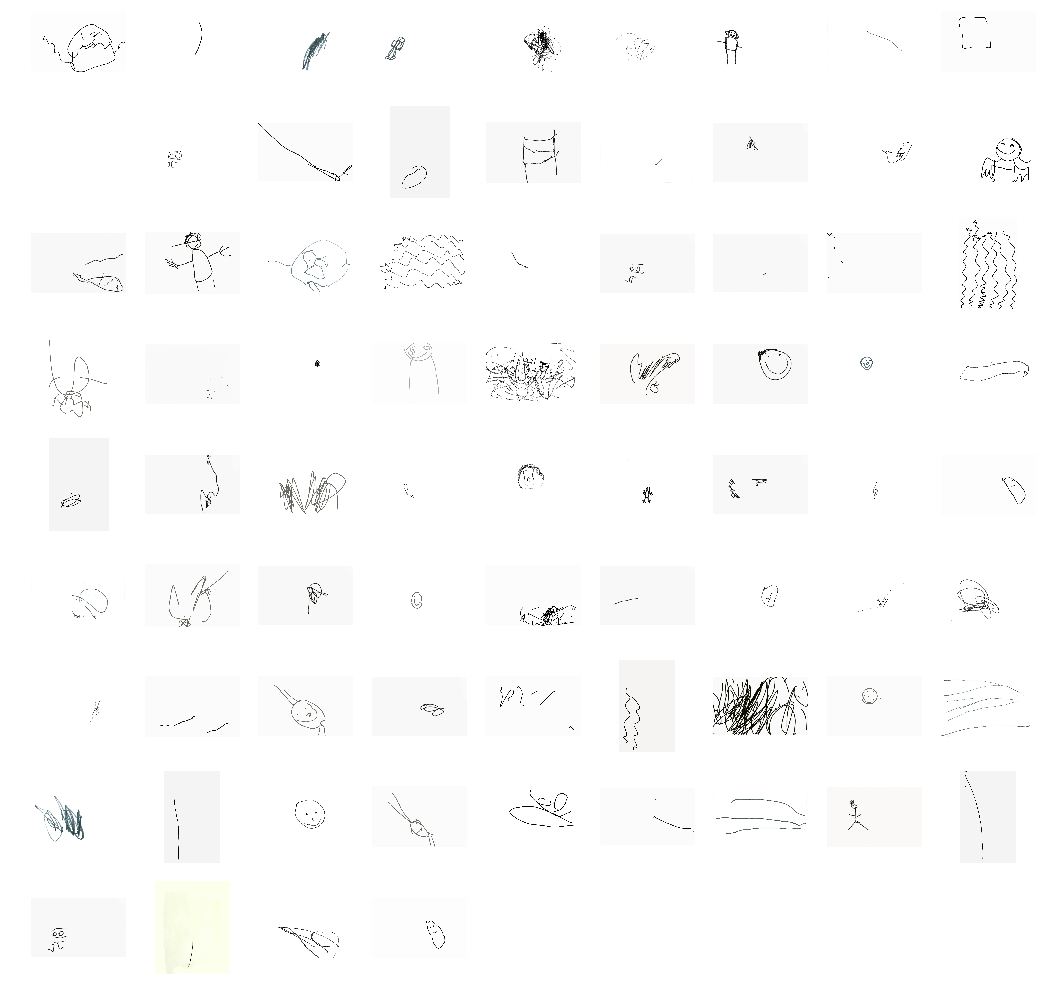

In [ ]:
# Let's plot all images classified together in cluster 2

# Image parameters
width = 10
height = 10
nrows = 9
ncols = 9
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_2

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_2_block5_pool_drawings.png', dpi=200)
plt.show()

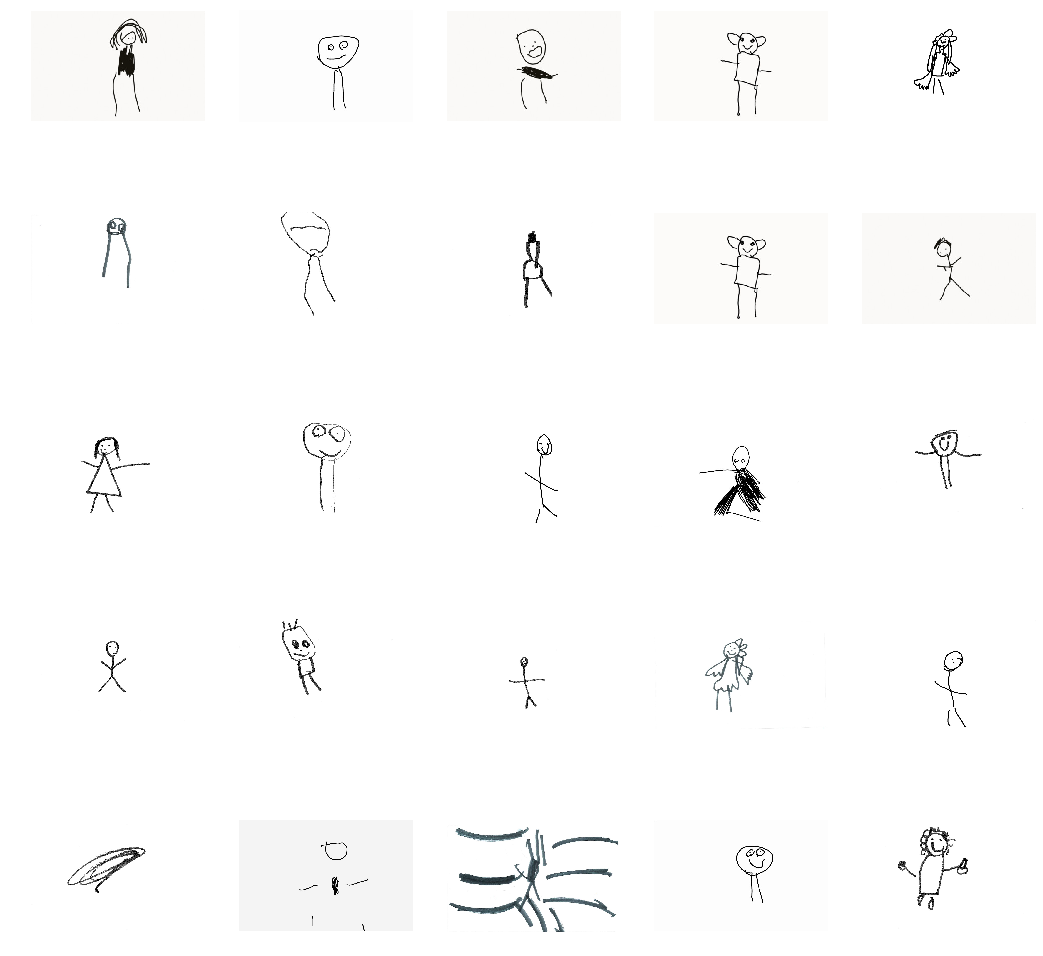

In [ ]:
# Let's plot all images classified together in cluster 3

# Image parameters
width = 10
height = 10
nrows = 5
ncols = 5
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster = cluster_3

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_3_block5_pool_drawings.png', dpi=200)
plt.show()